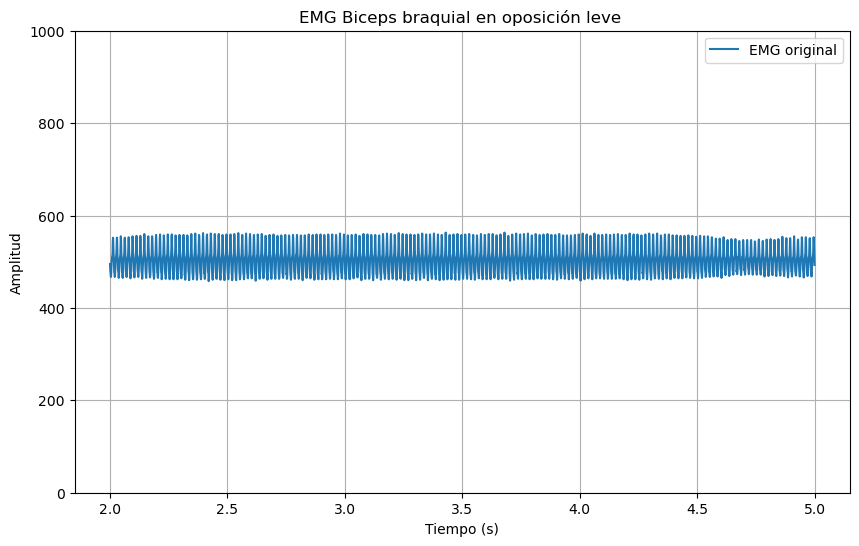

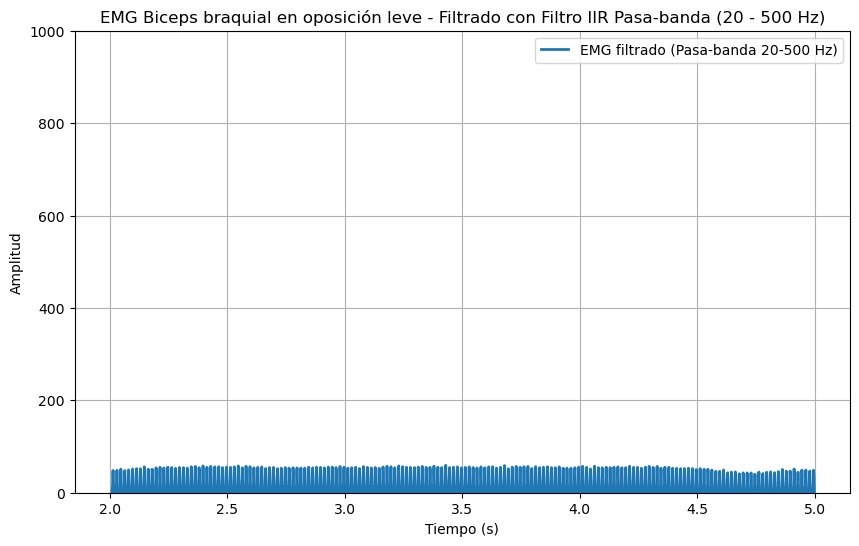

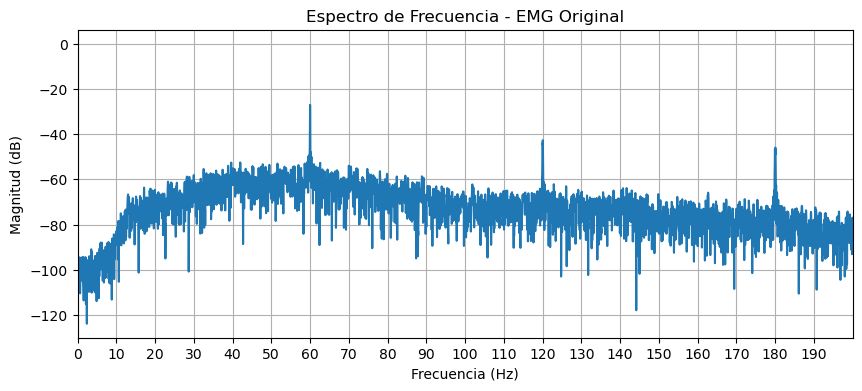

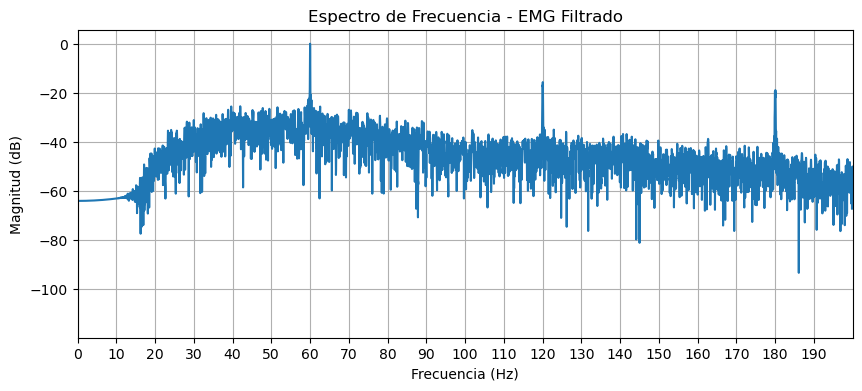

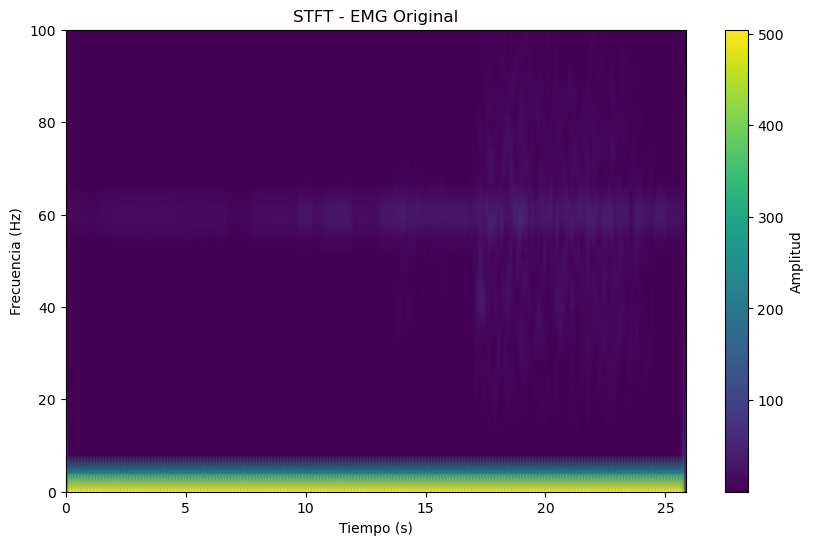

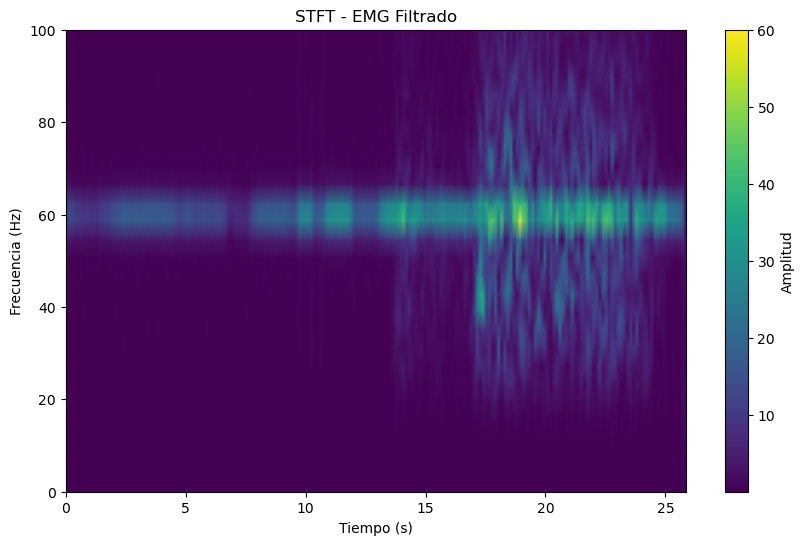

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal as sig

# Función para graficar la señal en el dominio de la frecuencia (FFT)
def plot_fft(signal, fs, title, filename):
    N = len(signal)
    fft_values = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_values)[:N//2]
    fft_frequencies = np.fft.fftfreq(N, 1/fs)[:N//2]
    fft_magnitude_db = 20 * np.log10(fft_magnitude / np.max(fft_magnitude))  # Magnitud en decibelios

    plt.figure(figsize=(10, 4))
    plt.plot(fft_frequencies, fft_magnitude_db)
    plt.grid(True)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud (dB)")
    plt.title(title)
    plt.xlim([0, 200])  # Ajusta el límite de frecuencia según sea necesario
    plt.xticks(np.arange(0, 200, 10))
    plt.savefig(f"{filename}.png", format='png')
    plt.show()

# Función para graficar la STFT (Transformada de Fourier de Ventana Corta)
def plot_stft(signal, fs, title, filename):
    f, t, Zxx = sig.stft(signal, fs=fs, nperseg=256)  # STFT con ventana de 256 muestras
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title(title)
    plt.ylabel('Frecuencia (Hz)')
    plt.xlabel('Tiempo (s)')
    plt.ylim([0, 100])
    plt.colorbar(label='Amplitud')
    plt.savefig(f"{filename}.png", format='png')
    plt.show()

# Cargar el archivo de señal ECG
file_path = 'D:\\Marco Ichillumpa\\Semestre 2024 - 2\\ISB\\Filtros - Lab 7\\Señales\\Bicep_leve.txt'
data = pd.read_csv(file_path, sep='\t', skiprows=10, header=None)

# Frecuencia de muestreo
fs = 1000  # Frecuencia de muestreo en Hz

# Extraer la columna de la señal ECG (columna 5)
ecg_signal = data[5].dropna().values


# Diseño del filtro IIR Butterworth pasa-banda (más estable)
order = 5 # Reducir el orden del filtro a 4
lowcut = 20  # Frecuencia de corte inferior (en Hz)
highcut = 490  # Frecuencia de corte superior (en Hz)

# Diseño del filtro IIR Butterworth pasa-banda
b, a = sig.butter(order, [lowcut / (fs / 2), highcut / (fs / 2)], btype='bandpass')

# Aplicar el filtro a la señal ECG
filtered_ecg = sig.filtfilt(b, a, ecg_signal)

# Crear el vector de tiempo
t = np.arange(0, len(ecg_signal)) / fs
#---------------------------------------------------------------------------------------------------

# Definir los límites de tiempo para graficar de 2 a 7 segundos
start_time = 2  # segundos
end_time = 5  # segundos

# Convertir los tiempos a índices
start_index = int(start_time * fs)
end_index = int(end_time * fs)

# Gráfica de la señal original
plt.figure(figsize=(10, 6))
plt.plot(t[start_index:end_index], ecg_signal[start_index:end_index], label='EMG original')
plt.title('EMG Biceps braquial en oposición leve ')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.ylim(0, 1000)
plt.legend()
plt.grid(True)
plt.savefig("EMG2.png", format='png')  # Guardar gráfica de la señal original en el tiempo
plt.show()

# Gráfica de la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(t[start_index:end_index], filtered_ecg[start_index:end_index], label='EMG filtrado (Pasa-banda 20-500 Hz)', linewidth=2)
plt.title('EMG Biceps braquial en oposición leve - Filtrado con Filtro IIR Pasa-banda (20 - 500 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.ylim(0, 1000)
plt.legend()
plt.grid(True)
plt.savefig("EMG2_FILTRO2.png", format='png')   # Guardar gráfica de la señal filtrada en el tiempo
plt.show()

# Graficar el dominio de la frecuencia
# Para la señal original
plot_fft(ecg_signal, fs, 'Espectro de Frecuencia - EMG Original', "FFT_EMG2")

# Para la señal filtrada
plot_fft(filtered_ecg, fs, 'Espectro de Frecuencia - EMG Filtrado', "FFT_EMG2_FILTRO2")

# Graficar la STFT (Transformada de Fourier de Ventana Corta)
# Para la señal original
plot_stft(ecg_signal, fs, 'STFT - EMG Original', "STFT_EMG2")

# Para la señal filtrada
plot_stft(filtered_ecg, fs, 'STFT - EMG Filtrado', "STFT_EMG2_FILTRO2")
